**Read Data**

In [1]:
import pandas as pd
 
data = pd.read_csv('TicTok_pre_proc.csv')
print('Number of records = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()


Number of records = 267
Number of attributes = 20


,Unnamed: 0,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_pop_minus_artist_pop
0,0,Say So,Doja Cat,0.88,Hot Pink,0.80,0.787,0.673,-4.583,0,11,0.1590,0.26400,0.000003,0.0904,0.779,110.962,4,237893,-0.08
1,1,Blinding Lights,The Weeknd,0.93,After Hours,0.90,0.514,0.730,-5.934,1,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200040,-0.03
2,2,Supalonely (feat. Gus Dapperton),BENEE,0.67,Hey u x,0.63,0.862,0.631,-4.746,1,7,0.0515,0.29100,0.000209,0.1230,0.841,128.978,4,223488,-0.04
3,3,Savage,Megan Thee Stallion,0.82,Suga,0.70,0.843,0.741,-5.609,1,11,0.3340,0.02520,0.000000,0.0960,0.680,168.983,4,155497,-0.12
4,4,Moral of the Story,Ashe,0.68,Moral of the Story,0.76,0.572,0.406,-8.624,1,10,0.0427,0.58700,0.000004,0.1020,0.265,119.812,4,201084,0.08


**Check missing values**

In [2]:
#got help from: https://www.datasciencemadesimple.com/check-count-missing-values-pandas-python-2/
''' there seem to be no missing values in this dataset, YAY'''
data.isnull().any()

Unnamed: 0                    False
track_name                    False
artist_name                   False
artist_pop                    False
album                         False
track_pop                     False
danceability                  False
energy                        False
loudness                      False
mode                          False
key                           False
speechiness                   False
acousticness                  False
instrumentalness              False
liveness                      False
valence                       False
tempo                         False
time_signature                False
duration_ms                   False
track_pop_minus_artist_pop    False
dtype: bool

In [3]:
#But the data dictionary said key signature = -1 means N/A, so we should check for that
print('Number of rows before dropping N/A = %d' % (data.shape[0]))
data = data[data.key != -1]
print('Number of rows after dropping N/A = %d' % (data.shape[0]))


Number of rows before dropping N/A = 267
Number of rows after dropping N/A = 267


**Column Drop/Add/Update**

artist_pop and track_pop where values from 1 to 100. We maped them to be from 0 to 1 so they did not outway other variables. 

In [4]:
#got help from: https://www.statology.org/pandas-apply-function-to-every-row/
#map values from 0 to 1

data['artist_pop'] = data.apply(lambda x: x["artist_pop"] / 100, axis=1)
data['track_pop'] = data.apply(lambda x: x["track_pop"] / 100, axis=1)
data.head()

,Unnamed: 0,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_pop_minus_artist_pop
0,0,Say So,Doja Cat,0.0088,Hot Pink,0.0080,0.787,0.673,-4.583,0,11,0.1590,0.26400,0.000003,0.0904,0.779,110.962,4,237893,-0.08
1,1,Blinding Lights,The Weeknd,0.0093,After Hours,0.0090,0.514,0.730,-5.934,1,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200040,-0.03
2,2,Supalonely (feat. Gus Dapperton),BENEE,0.0067,Hey u x,0.0063,0.862,0.631,-4.746,1,7,0.0515,0.29100,0.000209,0.1230,0.841,128.978,4,223488,-0.04
3,3,Savage,Megan Thee Stallion,0.0082,Suga,0.0070,0.843,0.741,-5.609,1,11,0.3340,0.02520,0.000000,0.0960,0.680,168.983,4,155497,-0.12
4,4,Moral of the Story,Ashe,0.0068,Moral of the Story,0.0076,0.572,0.406,-8.624,1,10,0.0427,0.58700,0.000004,0.1020,0.265,119.812,4,201084,0.08


0.4158133708588965

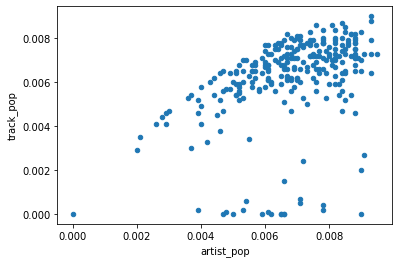

In [5]:
#Check if there's any column that can be dropped
"""
I ploted the track-pop and artist_pop and found the correlation 
I thought they might be so simmilar we could get rid of one but they are not. 
"""

data.plot.scatter("artist_pop","track_pop")
data["artist_pop"].corr(data["track_pop"])

-0.09705944362456465

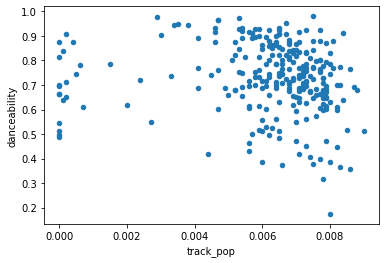

In [6]:
data.plot.scatter("track_pop","danceability")
data["track_pop"].corr(data["danceability"])

Added track_pop_minus_artist_pop to represent track popularity minus artist popularity. A track made by a popular artist will naturaly have some degree of popularity.  This colume is meant to help find tracks that are more popular than you would expect given the artists popularity. This value will be high when the track_pop is high and the artest_pop is low.

In [7]:
#Add track_pop_minus_artist_pop column
data['track_pop_minus_artist_pop'] = data.apply(lambda x: x["track_pop"] - x["artist_pop"], axis=1)
data.head()


,Unnamed: 0,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_pop_minus_artist_pop
0,0,Say So,Doja Cat,0.0088,Hot Pink,0.0080,0.787,0.673,-4.583,0,11,0.1590,0.26400,0.000003,0.0904,0.779,110.962,4,237893,-0.0008
1,1,Blinding Lights,The Weeknd,0.0093,After Hours,0.0090,0.514,0.730,-5.934,1,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200040,-0.0003
2,2,Supalonely (feat. Gus Dapperton),BENEE,0.0067,Hey u x,0.0063,0.862,0.631,-4.746,1,7,0.0515,0.29100,0.000209,0.1230,0.841,128.978,4,223488,-0.0004
3,3,Savage,Megan Thee Stallion,0.0082,Suga,0.0070,0.843,0.741,-5.609,1,11,0.3340,0.02520,0.000000,0.0960,0.680,168.983,4,155497,-0.0012
4,4,Moral of the Story,Ashe,0.0068,Moral of the Story,0.0076,0.572,0.406,-8.624,1,10,0.0427,0.58700,0.000004,0.1020,0.265,119.812,4,201084,0.0008


In [8]:
import numpy as np

for i in range(data.shape[1]):
  if np.issubdtype(data[data.columns[i]].dtype, np.number) and not (data.columns[i] == "track_pop" or data.columns[i] == "artist_pop" or data.columns[i] == "track_pop_minus_artist_pop"):
    print(data.columns[i])
    print(data["track_pop_minus_artist_pop"].corr(data[data.columns[i]]))
    


Unnamed: 0
0.04503043290481023
danceability
0.015400797147599317
energy
-0.016699997029794623
loudness
-0.047147286671316437
mode
-0.021211358553581496
key
0.12390684083432157
speechiness
-0.12861876344987677
acousticness
0.12114966428025462
instrumentalness
0.06671502860581416
liveness
-0.0719818314838633
valence
0.1382766158146598
tempo
0.019280402369364236
time_signature
-0.06565526327367542
duration_ms
-0.011389344470242778


This code displays the correlation between each numeric value and track_pop_minus_artist_pop to see if any of the variables on their own make good predicters of track_pop_minus_artist_pop.

**Outliers**

<AxesSubplot:>

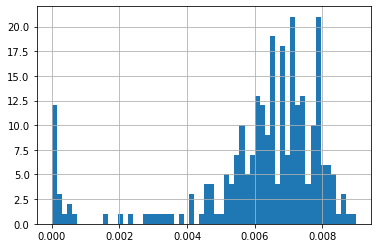

In [9]:
#Deal with outliers
#skewed left (not bell curve)

%matplotlib inline

data['track_pop'].hist(bins=60)

<AxesSubplot:>

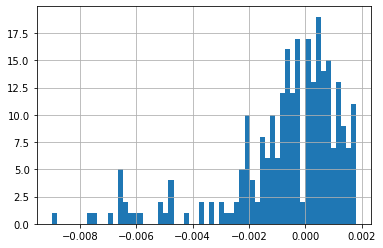

In [10]:
%matplotlib inline

data['track_pop_minus_artist_pop'].hist(bins=60)

<AxesSubplot:>

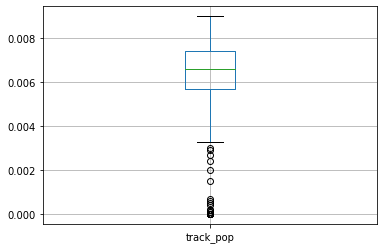

In [11]:
data.boxplot(column=['track_pop'])


<AxesSubplot:>

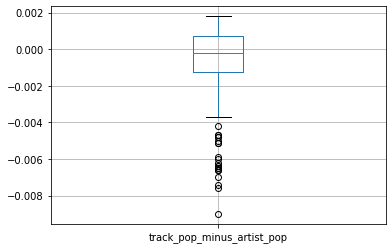

In [12]:
data.boxplot(column=['track_pop_minus_artist_pop'])

<AxesSubplot:>

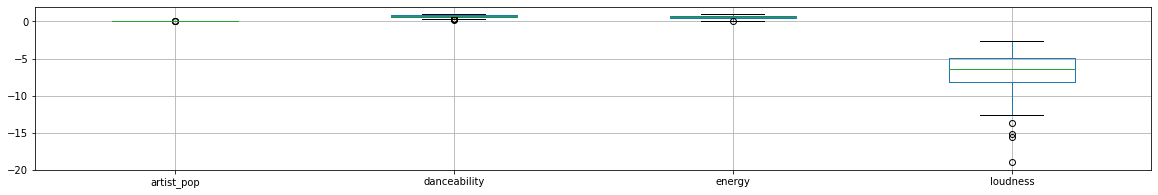

In [13]:
data.boxplot(column=['artist_pop','danceability','energy','loudness'], figsize = (20, 3))

<AxesSubplot:>

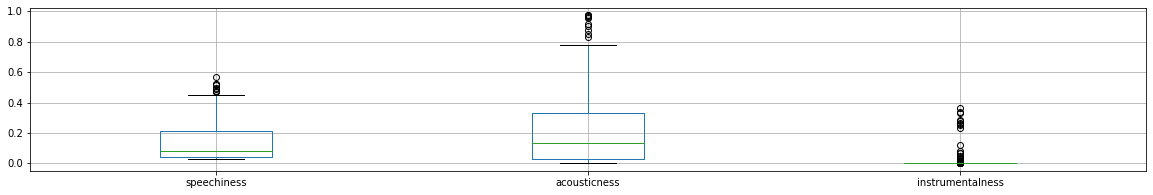

In [14]:
data.boxplot(column=['speechiness','acousticness','instrumentalness'], figsize = (20, 3))

<AxesSubplot:>

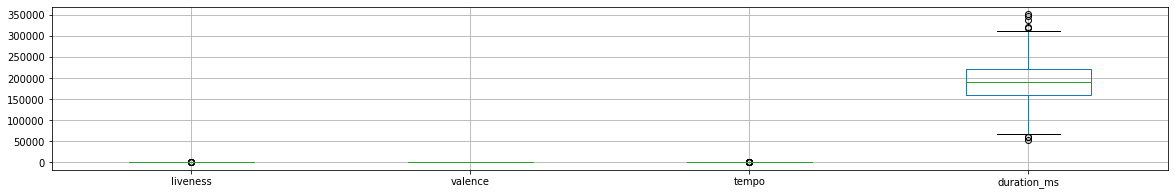

In [15]:
data.boxplot(column=['liveness','valence','tempo','duration_ms'], figsize = (20, 3))

In [16]:
# Calculate Z-score and Get rid of outliers
data1 = data.drop(['album'],axis=1)
data1 = data1.drop(['artist_name'],axis=1)
data1 = data1.drop(['track_name'],axis=1)
Z = (data1-data1.mean())/data1.std()
Z[0:10]

,Unnamed: 0,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_pop_minus_artist_pop
0,-1.757897,1.255424,0.904412,0.421406,0.376200,0.886535,-1.055868,1.590290,0.144138,0.122196,-0.223493,-0.747828,1.095450,-0.319253,0.179153,0.936270,-0.071771
1,-1.745954,1.568225,1.390087,-1.463286,0.733251,0.326203,0.943541,-1.100505,-0.643373,-0.913143,-0.221781,-0.754119,-1.002106,2.104298,0.179153,0.174922,0.176453
2,-1.734012,-0.058343,0.078763,0.939178,0.113110,0.818931,0.943541,0.513972,-0.709264,0.228672,-0.219668,-0.454872,1.387693,0.407937,0.179153,0.646538,0.126808
3,-1.722070,0.880062,0.418736,0.808009,0.802155,0.460998,0.943541,1.590290,1.533397,-0.819523,-0.223556,-0.697505,0.628802,2.022683,0.179153,-0.720985,-0.270350
4,-1.710127,0.004218,0.710142,-1.062875,-1.296302,-0.789485,0.943541,1.321210,-0.779124,1.395963,-0.223472,-0.643586,-1.327345,0.037964,0.179153,0.195920,0.722546
5,-1.698185,1.005182,0.613006,-0.372512,1.516257,1.226219,0.943541,1.052131,-0.802939,-0.836086,-0.223556,1.342404,0.468540,0.168904,0.179153,-0.183899,-0.171061
6,-1.686242,1.005182,0.127331,-0.193017,1.165470,0.974049,0.943541,-0.831425,-0.846602,-0.868029,-0.223454,0.371875,-0.921975,-0.117637,0.179153,-0.595558,-0.667509
7,-1.662358,0.880062,0.661574,-0.013523,-0.763858,0.288875,0.943541,0.783051,-0.883119,-0.847917,-0.223316,-0.763105,-0.771139,-0.558044,0.179153,-0.414277,-0.022126
8,-1.650415,1.255424,0.661574,-0.545103,1.447353,1.229537,0.943541,-1.369584,-0.755308,-0.864874,-0.211316,-0.643586,0.939901,1.134038,0.179153,0.049998,-0.319995
9,-1.638473,-0.058343,0.224466,0.518057,-0.149981,0.648467,0.943541,0.513972,-0.733080,-0.578572,-0.223556,-0.104404,0.157442,-0.078202,0.179153,-0.225192,0.275743


In [17]:
#Discard values with Z <= -3 or Z > 3
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==16) & ((Z <= 3).sum(axis=1)==16),:]
print('Number of rows after discarding outlying values = %d' % (Z2.shape[0]))

col = 'track_pop'
cols_to_replace = ['Latitude', 'Longitude']
data.loc[data[col].isin(Z2[col]), cols_to_replace] = Z2.loc[Z2[col].isin(data[col]),cols_to_replace].values
data.head()


Number of rows before discarding outliers = 267
Number of rows after discarding outlying values = 6


KeyError: "None of [Index(['Latitude', 'Longitude'], dtype='object')] are in the [columns]"

**Deal with Duplicated data**

In [18]:
#Duplicate data
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [19]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data.shape[0]))

Number of rows before discarding duplicates = 267
Number of rows after discarding duplicates = 267


**Aggregation**

In [20]:
#Aggregation on artist_name
artists = data.groupby(["artist_name"]).mean()
print(F"Number of observations: {artists.shape[0]}")
artists.head(10)

Number of observations: 214


,Unnamed: 0,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_pop_minus_artist_pop
artist_name,,,,,,,,,,,,,,,,,
24kGoldn,140.333333,0.0074,0.007567,0.7110,0.6580,-4.501667,0.0,5.333333,0.088133,0.138333,0.000000,0.1745,0.659667,120.684333,4.0,144053.0,0.000167
347aidan,203.000000,0.0070,0.007500,0.9800,0.4130,-11.052000,0.0,8.000000,0.101000,0.671000,0.000079,0.1700,0.764000,119.993000,4.0,180139.0,0.000500
50 Cent,239.000000,0.0082,0.007300,0.9250,0.6590,-4.763000,1.0,3.000000,0.231000,0.206000,0.000079,0.2790,0.710000,97.018000,4.0,214227.0,-0.000900
6ix9ine,159.500000,0.0071,0.000600,0.6775,0.5550,-7.317000,1.0,1.000000,0.317500,0.029150,0.000055,0.1805,0.443000,179.234000,4.0,167485.0,-0.006500
ABBA,166.000000,0.0080,0.007200,0.6950,0.7010,-6.435000,1.0,0.000000,0.028100,0.018700,0.046400,0.2510,0.580000,133.000000,4.0,272507.0,-0.000800
Absofacto,18.000000,0.0056,0.006800,0.6880,0.5820,-10.668000,0.0,6.000000,0.054200,0.230000,0.000157,0.0663,0.872000,85.486000,4.0,224661.0,0.001200
Akon,280.000000,0.0079,0.006400,0.8630,0.5010,-8.753000,0.0,9.000000,0.043300,0.016400,0.000000,0.2720,0.357000,99.994000,4.0,246765.0,-0.001500
Ant Saunders,170.500000,0.0052,0.006150,0.8410,0.4195,-8.492000,1.0,7.000000,0.145950,0.320500,0.000000,0.0700,0.686500,129.040000,4.0,201965.0,0.000950
Ariana Grande,12.000000,0.0087,0.008200,0.5970,0.4500,-6.658000,1.0,8.000000,0.041800,0.223000,0.000000,0.3820,0.537000,178.765000,3.0,228482.0,-0.000500


**Sampling**

In [21]:
data.head()

,Unnamed: 0,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_pop_minus_artist_pop
0,0,Say So,Doja Cat,0.0088,Hot Pink,0.0080,0.787,0.673,-4.583,0,11,0.1590,0.26400,0.000003,0.0904,0.779,110.962,4,237893,-0.0008
1,1,Blinding Lights,The Weeknd,0.0093,After Hours,0.0090,0.514,0.730,-5.934,1,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200040,-0.0003
2,2,Supalonely (feat. Gus Dapperton),BENEE,0.0067,Hey u x,0.0063,0.862,0.631,-4.746,1,7,0.0515,0.29100,0.000209,0.1230,0.841,128.978,4,223488,-0.0004
3,3,Savage,Megan Thee Stallion,0.0082,Suga,0.0070,0.843,0.741,-5.609,1,11,0.3340,0.02520,0.000000,0.0960,0.680,168.983,4,155497,-0.0012
4,4,Moral of the Story,Ashe,0.0068,Moral of the Story,0.0076,0.572,0.406,-8.624,1,10,0.0427,0.58700,0.000004,0.1020,0.265,119.812,4,201084,0.0008


In [22]:
# sample without replacement
sample = data.sample(n=3)
sample

,Unnamed: 0,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_pop_minus_artist_pop
42,47,Mariposa,Peach Tree Rascals,0.0060,Mariposa,0.0074,0.676,0.525,-5.88,1,9,0.0280,0.6170,0.00000,0.356,0.421,112.011,4,210000,0.0014
231,252,Ponteme Despalda,Nfasis,0.0054,Ponteme Despalda,0.0006,0.780,0.766,-7.72,1,0,0.0700,0.0181,0.00172,0.342,0.441,96.011,4,77049,-0.0048
37,42,Psycho!,MASN,0.0060,How To Kill A Rockstar,0.0068,0.876,0.312,-10.17,1,7,0.0521,0.4430,0.00000,0.247,0.377,114.973,4,197217,0.0008


In [23]:
# sample without replacement. Sample size = 1% of the data.
sample = data.sample(frac=0.01, random_state=1)
sample

,Unnamed: 0,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_pop_minus_artist_pop
12,13,Break My Heart,Dua Lipa,0.0088,Future Nostalgia,0.0078,0.730,0.729,-3.434,0,4,0.0884,0.1670,0.000001,0.3490,0.467,113.011,4,221820,-0.0010
38,43,Party Girl,StaySolidRocky,0.0059,Party Girl,0.0071,0.728,0.431,-9.966,0,6,0.0622,0.7490,0.000000,0.0996,0.629,130.022,4,147800,0.0012
116,130,TROLLZ (with Nicki Minaj),6ix9ine,0.0071,TROLLZ (with Nicki Minaj),0.0005,0.744,0.422,-8.946,1,1,0.2940,0.0319,0.000110,0.1100,0.493,180.006,4,202667,-0.0066


In [24]:
#sample with replacement
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample

,Unnamed: 0,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_pop_minus_artist_pop
37,42,Psycho!,MASN,0.0060,How To Kill A Rockstar,0.0068,0.876,0.312,-10.170,1,7,0.0521,0.443,0.0,0.247,0.377,114.973,4,197217,0.0008
235,257,"Lemonade (feat. Gunna, Don Toliver & NAV)",Internet Money,0.0072,B4 The Storm,0.0077,0.800,0.658,-6.142,0,1,0.0790,0.250,0.0,0.111,0.462,140.042,4,195429,0.0005
72,84,Candy,Doja Cat,0.0088,Amala,0.0071,0.689,0.516,-5.857,1,8,0.0444,0.513,0.0,0.163,0.209,124.876,4,190920,-0.0017


**Discretization**

In [25]:
bins = pd.qcut(data['energy'],8)
bins.value_counts(sort=False)


(0.0448, 0.418]    34
(0.418, 0.488]     33
(0.488, 0.574]     33
(0.574, 0.633]     34
(0.633, 0.678]     33
(0.678, 0.729]     35
(0.729, 0.798]     31
(0.798, 0.955]     34
Name: energy, dtype: int64

Visualization 

IndexError: index 5 is out of bounds for axis 0 with size 5

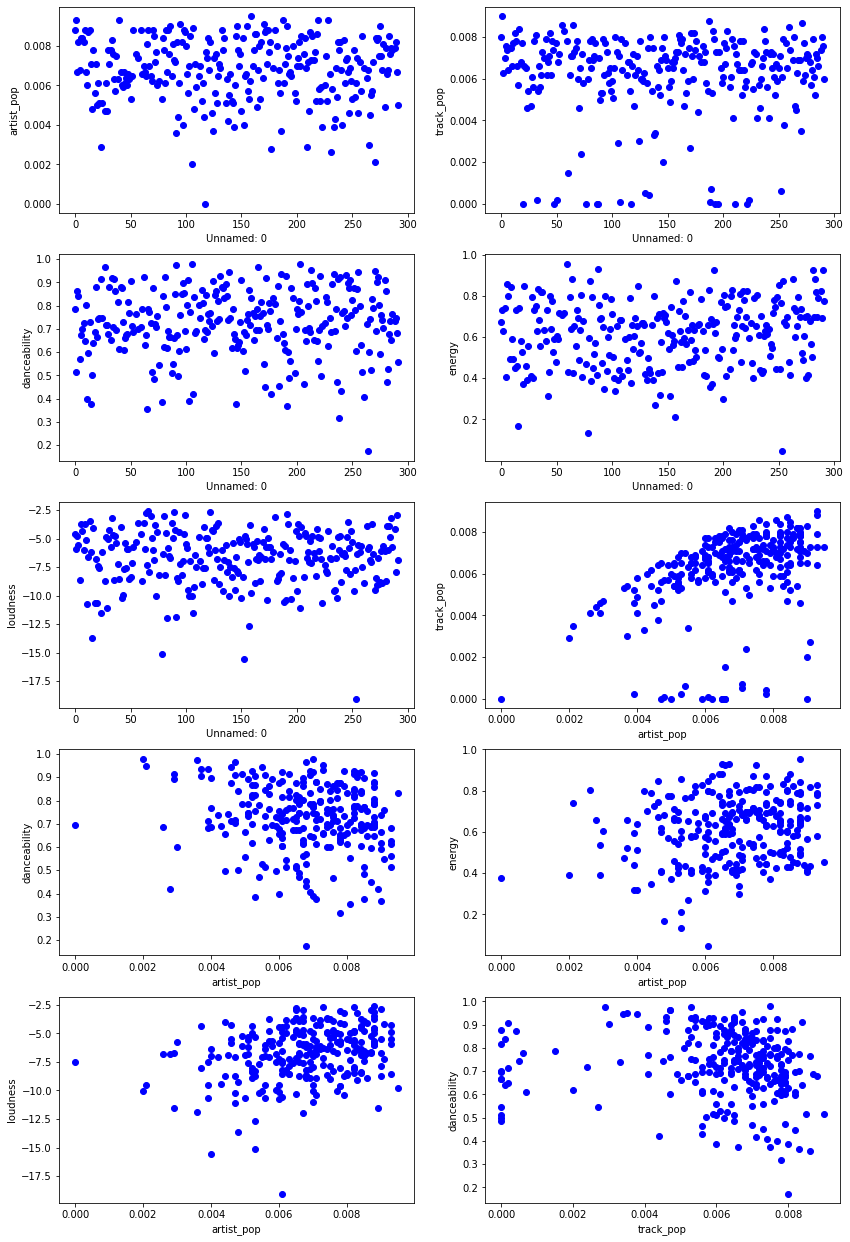

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 2, figsize=(14,22))
index = 0
for i in range(int(data.shape[1] / 2) - 1):
    for j in range(i+1,int(data.shape[1] / 2) - 1):
        if np.issubdtype(data[data.columns[i]].dtype, np.number) and np.issubdtype(data[data.columns[j]].dtype, np.number):
          ax1 = int(index/2)
          ax2 = index % 2
          axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color='blue')
          axes[ax1][ax2].set_xlabel(data.columns[i])
          axes[ax1][ax2].set_ylabel(data.columns[j])
          index = index + 1
    

The scatter plots indicate a strong positive correlation between loudness and energy. Also, track_pop and artist_pop seem to be directly proportional. Other than those, the trends are not very clear for other plots. 


# ** The cluster and anomoly detetion starts here **

In [28]:
TicTokData = data

    # adding id to data (nessesary as track_name is str type and droped)
TicTokData["id"] = 0;
for i in range(TicTokData.shape[0]):
    TicTokData.at[i,"id"] = i;

    #geting rid of the string vars 
dataWithOutStrs = TicTokData.copy()
    #I used https://www.statology.org/drop-column-pandas/
dataWithOutStrs.drop(["track_name","artist_name","album" ], axis=1, inplace=True)


    #binary data 
binaryData = dataWithOutStrs.copy()
binaryData.drop(["id"], axis=1, inplace=True)
    # to make small subset
#binaryData = binaryData[["artist_pop","track_pop", "key" ]]
for col in binaryData.columns:
    for i in range(binaryData.shape[0]):
        if(binaryData.at[i,col] <= binaryData[col].mean()):
            binaryData.at[i,col] = 0
        else:
            binaryData.at[i,col] = 1
        binaryData[col] =  binaryData[[col]].astype(int)

In [29]:
TicTokData.head()

,Unnamed: 0,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_pop_minus_artist_pop,id
0,0,Say So,Doja Cat,0.0088,Hot Pink,0.0080,0.787,0.673,-4.583,0,...,0.1590,0.26400,0.000003,0.0904,0.779,110.962,4,237893,-0.0008,0
1,1,Blinding Lights,The Weeknd,0.0093,After Hours,0.0090,0.514,0.730,-5.934,1,...,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200040,-0.0003,1
2,2,Supalonely (feat. Gus Dapperton),BENEE,0.0067,Hey u x,0.0063,0.862,0.631,-4.746,1,...,0.0515,0.29100,0.000209,0.1230,0.841,128.978,4,223488,-0.0004,2
3,3,Savage,Megan Thee Stallion,0.0082,Suga,0.0070,0.843,0.741,-5.609,1,...,0.3340,0.02520,0.000000,0.0960,0.680,168.983,4,155497,-0.0012,3
4,4,Moral of the Story,Ashe,0.0068,Moral of the Story,0.0076,0.572,0.406,-8.624,1,...,0.0427,0.58700,0.000004,0.1020,0.265,119.812,4,201084,0.0008,4


In [30]:
dataWithOutStrs.head()

,Unnamed: 0,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_pop_minus_artist_pop,id
0,0,0.0088,0.0080,0.787,0.673,-4.583,0,11,0.1590,0.26400,0.000003,0.0904,0.779,110.962,4,237893,-0.0008,0
1,1,0.0093,0.0090,0.514,0.730,-5.934,1,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200040,-0.0003,1
2,2,0.0067,0.0063,0.862,0.631,-4.746,1,7,0.0515,0.29100,0.000209,0.1230,0.841,128.978,4,223488,-0.0004,2
3,3,0.0082,0.0070,0.843,0.741,-5.609,1,11,0.3340,0.02520,0.000000,0.0960,0.680,168.983,4,155497,-0.0012,3
4,4,0.0068,0.0076,0.572,0.406,-8.624,1,10,0.0427,0.58700,0.000004,0.1020,0.265,119.812,4,201084,0.0008,4


In [31]:
binaryData.head()

,Unnamed: 0,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_pop_minus_artist_pop
0,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,0
1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0
2,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0
3,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0


Text(0, 0.5, 'SSE')

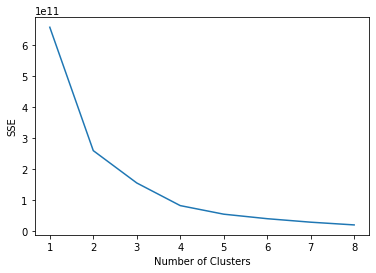

In [32]:
# looks like the little gane in acuracy is made after 4 
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6,7 ,8]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(dataWithOutStrs)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [33]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=4, max_iter=50, random_state=1)
k_means.fit(dataWithOutStrs)
labels = k_means.labels_
dataWithClusters = pd.DataFrame(labels, index=TicTokData.id, columns=["Cluster ID"])

dataWithClusters

,Cluster ID
id,
0,0
1,0
2,0
3,1
4,0
...,...
262,0
263,0
264,1


     Cluster ID
0             2
1             2
2             2
3             2
4             3
..          ...
262           3
263           1
264           3
265           3
266           3

[267 rows x 1 columns]


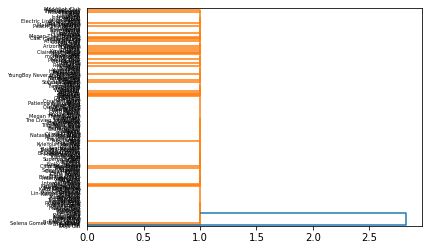

In [34]:
# need to binerize data 

from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline


k_means = cluster.KMeans(n_clusters=4, max_iter=50, random_state=1)
k_means.fit(binaryData) 
labels = k_means.labels_
cols = binaryData.columns.tolist()
cols.append('Cluster ID')

print(pd.DataFrame(labels, columns=['Cluster ID']))


names = TicTokData['artist_name']

X=binaryData

Z = hierarchy.linkage(X.values, 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')


<AxesSubplot:xlabel='danceability', ylabel='energy'>

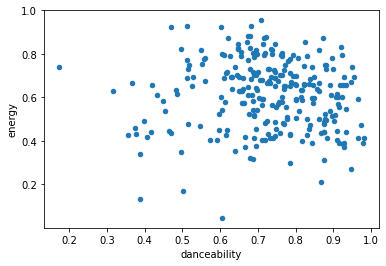

In [35]:
TicTokData.plot.scatter(x='danceability',y='energy')

,Unnamed: 0,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_pop_minus_artist_pop,id,Cluster ID
0,0,0.0088,0.0080,0.787,0.673,-4.583,0,11,0.1590,0.26400,0.000003,0.0904,0.779,110.962,4,237893,-0.0008,0,-1
1,1,0.0093,0.0090,0.514,0.730,-5.934,1,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200040,-0.0003,1,-1
2,2,0.0067,0.0063,0.862,0.631,-4.746,1,7,0.0515,0.29100,0.000209,0.1230,0.841,128.978,4,223488,-0.0004,2,0
3,3,0.0082,0.0070,0.843,0.741,-5.609,1,11,0.3340,0.02520,0.000000,0.0960,0.680,168.983,4,155497,-0.0012,3,-1
4,4,0.0068,0.0076,0.572,0.406,-8.624,1,10,0.0427,0.58700,0.000004,0.1020,0.265,119.812,4,201084,0.0008,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,286,0.0078,0.0066,0.765,0.791,-5.707,1,8,0.0317,0.26200,0.000154,0.0669,0.966,95.026,4,206227,-0.0012,262,8
263,288,0.0079,0.0074,0.735,0.824,-4.143,0,10,0.0360,0.61500,0.000000,0.1580,0.726,100.202,4,211666,-0.0005,263,-1
264,289,0.0082,0.0080,0.746,0.690,-7.956,1,11,0.1640,0.24700,0.000000,0.1010,0.497,89.977,4,181733,-0.0002,264,-1
265,290,0.0067,0.0076,0.682,0.927,-2.915,1,4,0.0479,0.08430,0.000000,0.1490,0.744,101.019,4,195613,0.0009,265,10


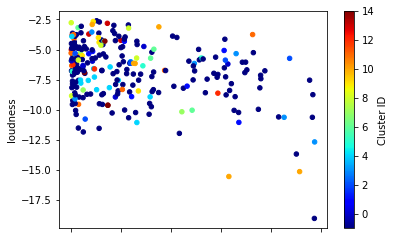

In [36]:
# with 2 dementions there is not meningule distincts clusters that I could find
# the cluster id is -1 and I dont know why 

from sklearn.cluster import DBSCAN
import numpy as np

    # make a DBSCAN and fit the data 
db = DBSCAN(eps=500, min_samples=4).fit(dataWithOutStrs)
    # idk 
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    #idk 
core_samples_mask[db.core_sample_indices_] = True
    # make new df with the DBSCAN's cluster id
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
    # add the new df to the old df so that it now has the cluster id 
result = pd.concat((dataWithOutStrs,labels), axis=1)
    # plot it 
result.plot.scatter(x='acousticness',y='loudness',c='Cluster ID', colormap='jet')
result

In [37]:
from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=500, min_samples=5).fit(dataWithOutStrs)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((dataWithOutStrs,labels), axis=1)
result

,Unnamed: 0,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,track_pop_minus_artist_pop,id,Cluster ID
0,0,0.0088,0.0080,0.787,0.673,-4.583,0,11,0.1590,0.26400,0.000003,0.0904,0.779,110.962,4,237893,-0.0008,0,-1
1,1,0.0093,0.0090,0.514,0.730,-5.934,1,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200040,-0.0003,1,-1
2,2,0.0067,0.0063,0.862,0.631,-4.746,1,7,0.0515,0.29100,0.000209,0.1230,0.841,128.978,4,223488,-0.0004,2,1
3,3,0.0082,0.0070,0.843,0.741,-5.609,1,11,0.3340,0.02520,0.000000,0.0960,0.680,168.983,4,155497,-0.0012,3,-1
4,4,0.0068,0.0076,0.572,0.406,-8.624,1,10,0.0427,0.58700,0.000004,0.1020,0.265,119.812,4,201084,0.0008,4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,286,0.0078,0.0066,0.765,0.791,-5.707,1,8,0.0317,0.26200,0.000154,0.0669,0.966,95.026,4,206227,-0.0012,262,-1
263,288,0.0079,0.0074,0.735,0.824,-4.143,0,10,0.0360,0.61500,0.000000,0.1580,0.726,100.202,4,211666,-0.0005,263,-1
264,289,0.0082,0.0080,0.746,0.690,-7.956,1,11,0.1640,0.24700,0.000000,0.1010,0.497,89.977,4,181733,-0.0002,264,-1
265,290,0.0067,0.0076,0.682,0.927,-2.915,1,4,0.0479,0.08430,0.000000,0.1490,0.744,101.019,4,195613,0.0009,265,8


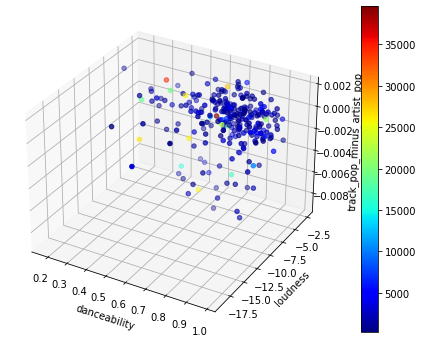

In [38]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance

knn = 6
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(dataWithOutStrs.values)
distances, indices = nbrs.kneighbors(dataWithOutStrs.values)

anomaly_score = distances[:,knn-1]

    # just graphing a few dementions 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(TicTokData["danceability"],TicTokData["loudness"],TicTokData["track_pop_minus_artist_pop"],c=anomaly_score,cmap='jet')
ax.set_xlabel("danceability")
ax.set_ylabel("loudness")
ax.set_zlabel("track_pop_minus_artist_pop")
fig.colorbar(p)
plt.show()
